---
<a id = Section3></a>
# **1. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

### **Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

---
<a name = Section4></a>
# **2. Data Acquisition & Description**
---


In [2]:
data=pd.read_csv('C:\\Users\\HP\\Desktop\\Insaid\\Machine Learning Supervised\\Project\\abalone_train.csv')
data.head()

,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


### **Data Information**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3341 non-null   int64  
 1   Sex             3341 non-null   object 
 2   Length          3341 non-null   float64
 3   Diameter        3341 non-null   float64
 4   Height          3341 non-null   float64
 5   Whole_weight    3341 non-null   float64
 6   Shucked_weight  3341 non-null   float64
 7   Viscera_weight  3341 non-null   float64
 8   Shell_weight    3341 non-null   float64
 9   Rings           3341 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 248.0+ KB


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [4]:
data.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,1197.721846,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1055.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,2086.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,3114.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


---
<a name = Section5></a>
# **3. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [5]:
#output_report=ProfileReport(data)
#output_report.to_file('abalone_pre_profiling.html')

  **Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 10
- Number of observations: 3341
- Missing cells: 0
- Duplicate rows: 0

__Variables types__: 
- Numeric = 9
- Categorical = 1

- **Id** has **unique values**
- **Length** is highly correlated with **Diameter** and 2 other fields	
- **Diameter** is highly correlated with **Length** and 2 other fields	
- **Whole_weight** is highly correlated with **Length** and 4 other fields	
- **Shucked_weight** is highly correlated with **Whole_weight** and 1 other field
- **Viscera_weight** is highly correlated with **Length** and 3 other fields	
- **Shell_weight** is highly correlated with **Diameter** and 2 other fields

---
<a name = Section6></a>
# **4. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos
  


- Since **Whole_weight** is highly correlated with 5 varibales hence removing it from the dataset.
- Since Id is just unique id and will help in our analysis hence removing Id from dataset.

In [6]:
new_data=data.copy()

In [7]:
data.drop(['Id'],axis=1,inplace=True)

In [8]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


# **5. Exploratory Data Analysis**

### 5.1 Which gender of Abalone has the highest average number of rings?

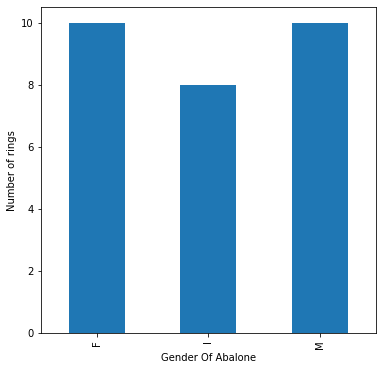

In [9]:
plt.figure(figsize=(6,6))
data.groupby('Sex')['Rings'].median().plot(kind='bar',xlabel='Gender Of Abalone',ylabel='Number of rings')
plt.show()

- Male and Female Abalones have approximately same number of rings 
- Infant Abalones have lesser number of rings

### 5.2 Which gender of Abalone has the maximum average total weight?

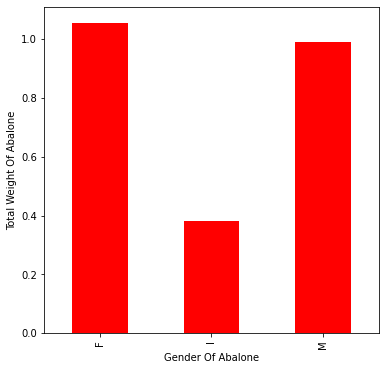

In [10]:
plt.figure(figsize=(6,6))
data.groupby('Sex')['Whole_weight'].median().plot(kind='bar',xlabel='Gender Of Abalone',ylabel='Total Weight Of Abalone',cmap='autumn')
plt.show()

- Female Abalones have higher weight than male and infant Abalones 

### 5.2 Which gender of Abalone has the maximum average length?

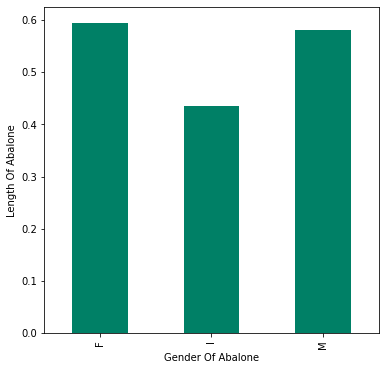

In [11]:
plt.figure(figsize=(6,6))
data.groupby('Sex')['Length'].median().plot(kind='bar',xlabel='Gender Of Abalone',ylabel='Length Of Abalone',cmap='summer')
plt.show()

- Female Abalones have greater length than male and infant Abalones 

### 5.3 Which gender of Abalone has the maximum average height?

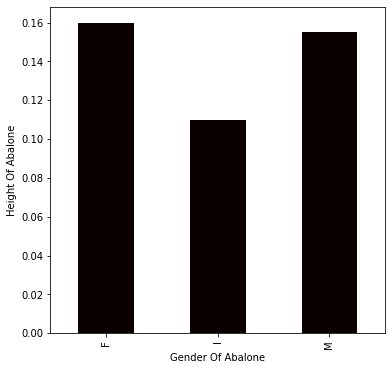

In [12]:
plt.figure(figsize=(6,6))
data.groupby('Sex')['Height'].median().plot(kind='bar',xlabel='Gender Of Abalone',ylabel='Height Of Abalone',cmap='hot')
plt.show()

- Female Abalones are taller than male and infant Abalones 

## 5.4 Relation Between Varibales

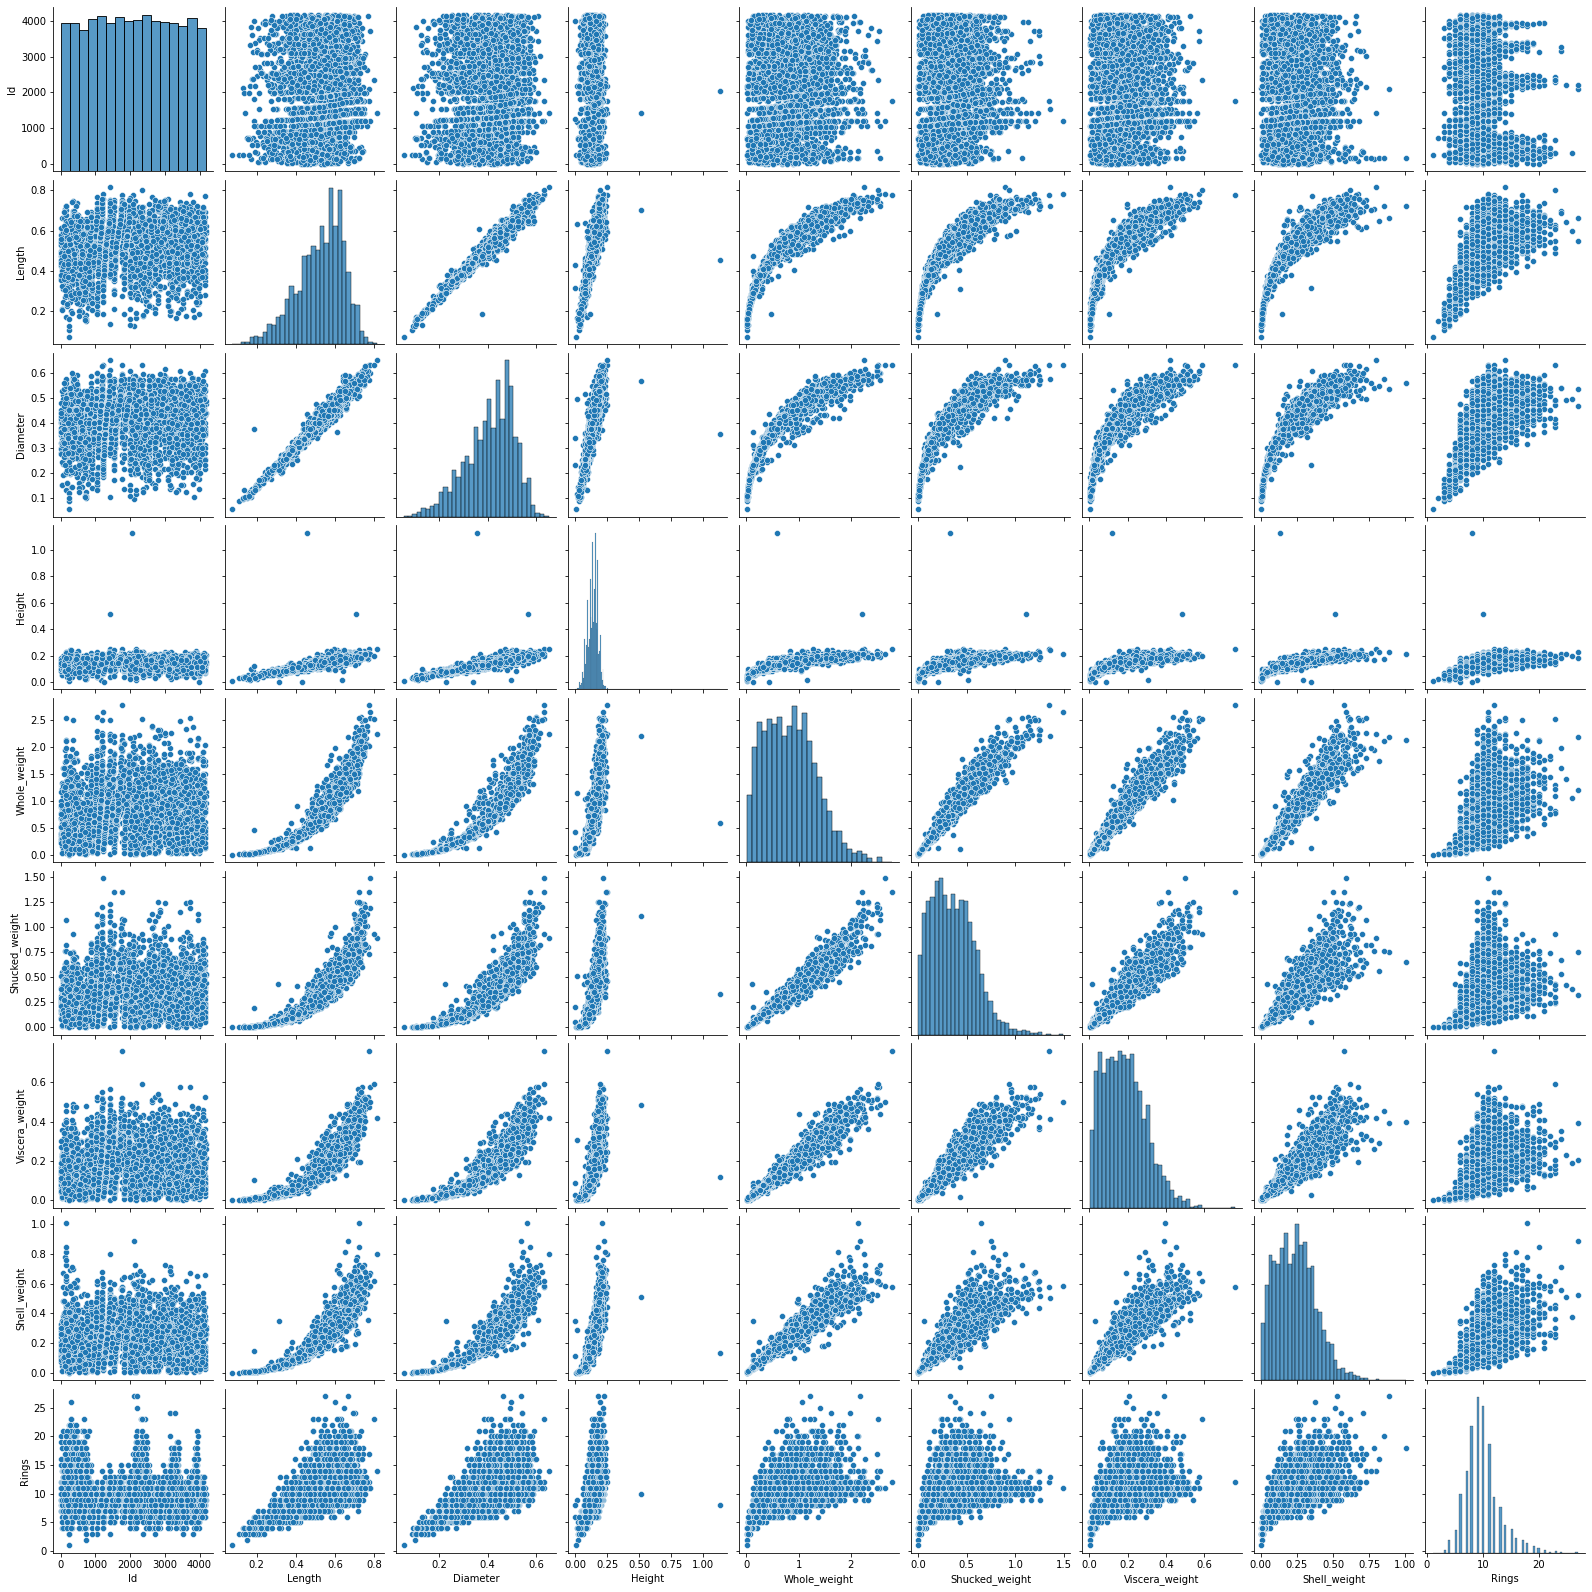

In [13]:
sns.pairplot(data=new_data)

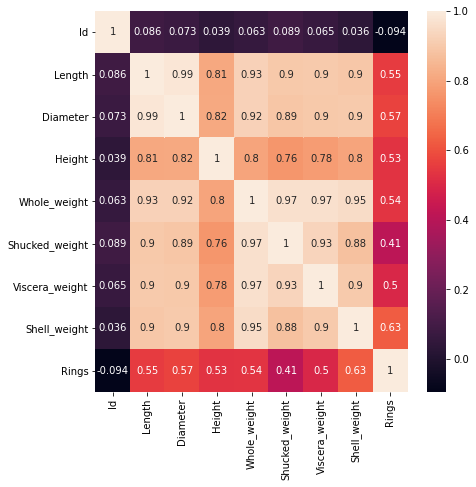

In [39]:
plt.figure(figsize=(7,7))
sns.heatmap(new_data.corr(),annot=True)
plt.show()

- **Length** and **Diameter** have almost perfect correlation
- **Whole_weight** is almsot perfectly correlated with **Shucked_weight** and **Viscera_weight**

## 6 Building Model

In [14]:
data=pd.get_dummies(data=data,columns=['Sex'],drop_first=True)

- Converted categorical column SEX into numerical column using one-hot encoding

In [15]:
data.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5,1,0
1,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3,1,0
2,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15,0,1
3,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10,0,1
4,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14,0,1


Storing the value of target variable in a variable y

In [16]:
y=data['Rings']

Storing the explanatory variables into a variable x

In [17]:
x=data.drop(['Rings','Length','Height','Sex_M'],axis=1)

Dividing the datasets into training and testing 

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=30)

- Since the independent variables have really high correlation between them hence, using Ridge Regresion to penalize the collinearity between variables with an alpha of 0.9

In [19]:
lr=Ridge(alpha=0.9)

In [20]:
lr.fit(X_train,Y_train)

Ridge(alpha=0.9)

In [21]:
y_pred=lr.predict(X_test)

In [22]:
y_pred_train=lr.predict(X_train)

In [23]:
r2_score(Y_train,y_pred_train)

0.521849205538101

- Variability explained by the model in the target variable in training dataset is 52%

In [24]:
r2_score(Y_test,y_pred)

0.5660426293662663

- Variability explained by the model in the target variable in testing dataset is 56.6%

In [25]:
np.sqrt(mean_squared_error(Y_test,y_pred))

2.020842287296214

- Root mean square error in testing dataset is 2.020

In [26]:
 np.sqrt(mean_squared_error(Y_train,y_pred_train))

2.2378083705404843

- Root mean square error in training dataset is 2.238

## 7. Uploading Test Dataset

In [27]:
test_data=pd.read_csv('C:\\Users\\HP\\Desktop\\Insaid\\Machine Learning Supervised\\Project\\abalone_test.csv')

In [28]:
test_data=pd.get_dummies(data=test_data,columns=['Sex'],drop_first=True)

In [29]:
test_data

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_I,Sex_M
0,668,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350,0,1
1,1580,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935,1,0
2,3784,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175,0,1
3,463,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200,1,0
4,2615,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775,0,1
...,...,...,...,...,...,...,...,...,...,...
831,575,0.610,0.475,0.140,1.1330,0.5275,0.2355,0.3500,0,0
832,3231,0.410,0.325,0.120,0.3745,0.1580,0.0810,0.1250,0,1
833,1084,0.445,0.345,0.105,0.4090,0.1675,0.1015,0.1170,1,0
834,290,0.540,0.435,0.180,0.9960,0.3835,0.2260,0.3250,0,1


In [30]:
test_data.drop('Id',axis=1,inplace=True)

In [31]:
test_data.drop(['Length','Height','Sex_M'],axis=1,inplace=True)

In [32]:
submit=lr.predict(test_data)

In [33]:
submit_df=pd.DataFrame(submit,columns=['Rings'])

In [34]:
submit_df

,Rings
0,13.150219
1,9.132960
2,10.729526
3,5.930784
4,10.891880
...,...
831,11.068045
832,9.112333
833,8.169912
834,11.986898


In [35]:
#submit_df.to_csv("submit_df1.csv",index=False)